In [1]:
import tensorflow as tf
from meta import Meta
%pylab inline
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


In [9]:
filename = '../dataset/svhn/test.tfrecords'
filename_queue = tf.train.string_input_producer([filename], num_epochs=None)

In [10]:
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
  serialized_example,
  features={
      'image': tf.FixedLenFeature([], tf.string),
      'length': tf.FixedLenFeature([], tf.int64),
      'digits': tf.FixedLenFeature([5], tf.int64)
  })

In [11]:
image = tf.decode_raw(features['image'], tf.uint8)
image = tf.reshape(image, [64, 64, 3])
length = features['length']
digits = features['digits']

In [12]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

length: 1, digits: 5,10,10,10,10


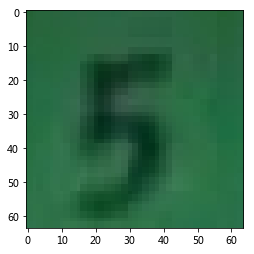

In [15]:
(image_val, length_val, digits_val) = sess.run([image, length, digits])

print( 'length: %d, digits: %d,%d,%d,%d,%d' % (
    length_val, digits_val[0], digits_val[1], digits_val[2], digits_val[3], digits_val[4]))

imshow(image_val)

In [18]:
meta = Meta()
meta.load('../dataset/svhn/meta.json')
print( 'num_train_examples: %d' % meta.num_train_examples)
print( 'num_val_examples: %d' % meta.num_val_examples)
print( 'num_test_examples: %d' % meta.num_test_examples)

num_train_examples: 212003
num_val_examples: 23751
num_test_examples: 13068


In [19]:
coord.request_stop()
coord.join(threads)
sess.close()